In [3]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 11.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366843 sha256=eb2db4b14c3ca5a88161fcbb64f542f135dff48b743d23e038443de372fe3750
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=0a9ec1912dc4e15ee3f7e10b22ba6a7c28023e522c851a7bd27f774117cc1994
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


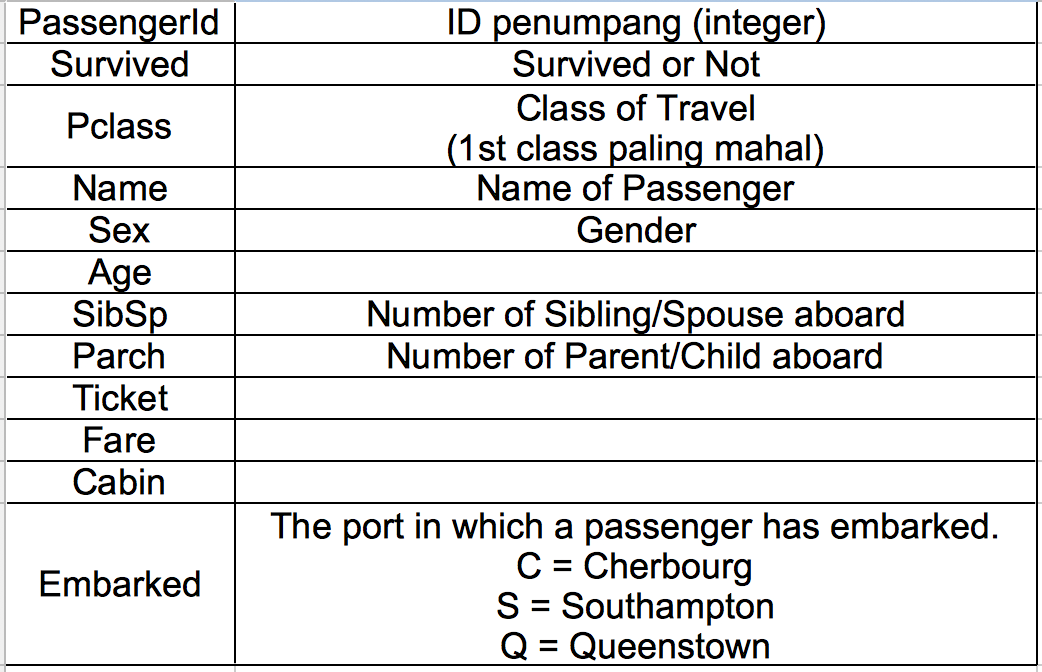

In [5]:
illustration.nomenklatur

In [6]:
df = pd.read_csv('/kaggle/input/titanic/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Quick Exploratory Data Analysis (Quick EDA)

In [8]:
from jcopml.plot import plot_missing_value

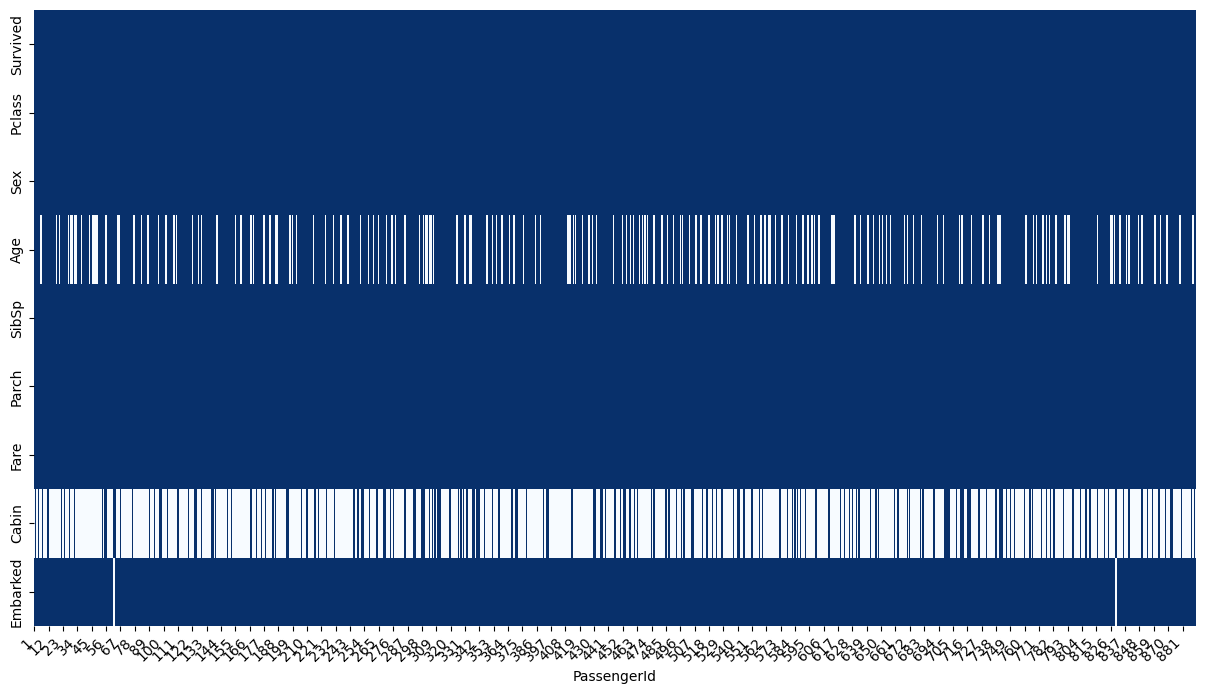

In [9]:
plot_missing_value(df)

In [10]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.fillna({"Embarked": 'S'}, inplace=True)

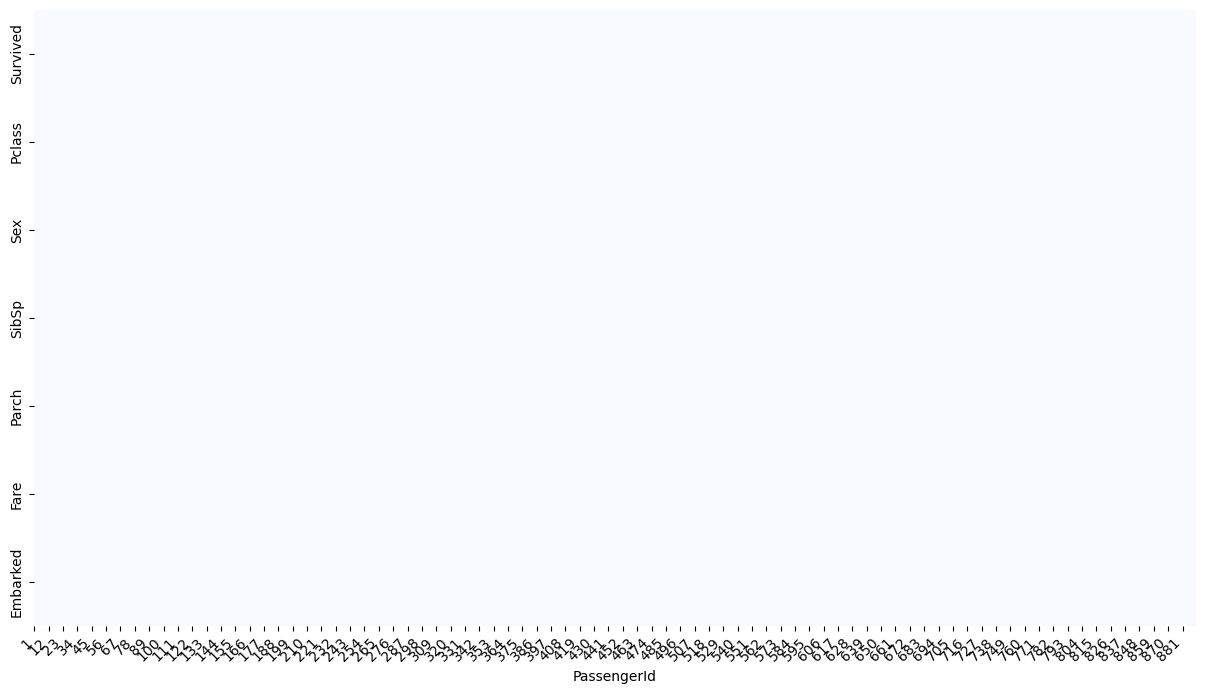

In [13]:
plot_missing_value(df)

# Data Preparation

In [14]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [15]:
X = df.drop(columns='Survived')
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])
X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


In [16]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# Intro to Scikit-learn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.score(X, y)

0.8855218855218855

# Concept 1: Dataset Splitting

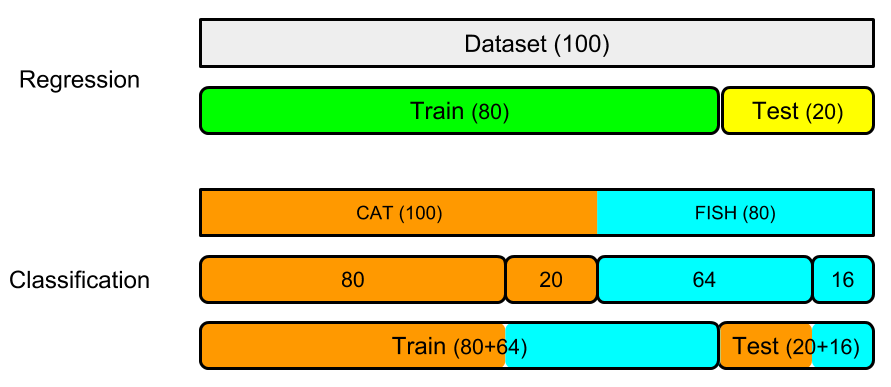

In [20]:
illustration.train_test_split

Dari case di atas, hati-hati dalam melakukan splitting data classification, usahakan menggunakan `stratified Shuffle Split` agar hasil splitting seperti ilustrasi di atas!

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, ) # stratify (selang seling) berdasarkan y (target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9199438202247191, 0.6815642458100558)

Model di atas mengalami `overfit` karena score train dibandingkan test lebih tinggi 

# Concept 2: K-fold Cross Validation

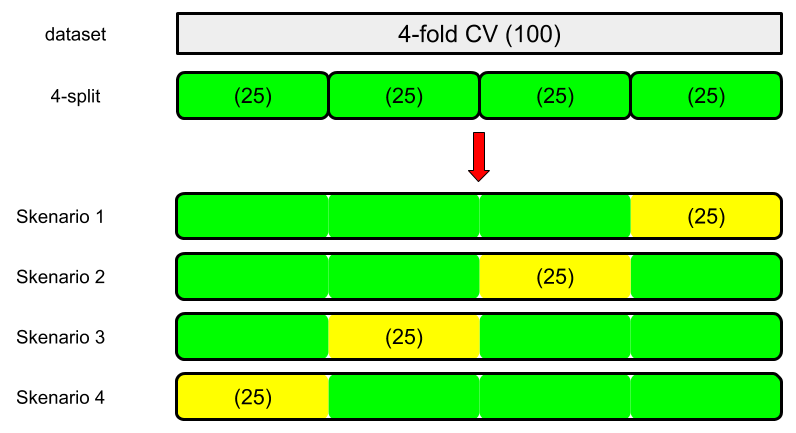

In [24]:
illustration.kfold_cv

`K-fold Cross Validation` digunakan untuk menghindari efek kebetulan ketika melakukan splitting data

Tetapi, nilai `fold` sendiri jangan terlalu besar untuk menghindari size validasi yang terlalu kecil

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5) # 5 fold

array([0.62569832, 0.67977528, 0.8258427 , 0.73033708, 0.79213483])

In [28]:
print(f'Rata-rata score 5 lapis validasi: {cross_val_score(knn, X, y, cv=5).mean()}')

Rata-rata score 5 lapis validasi: 0.7307576423325592


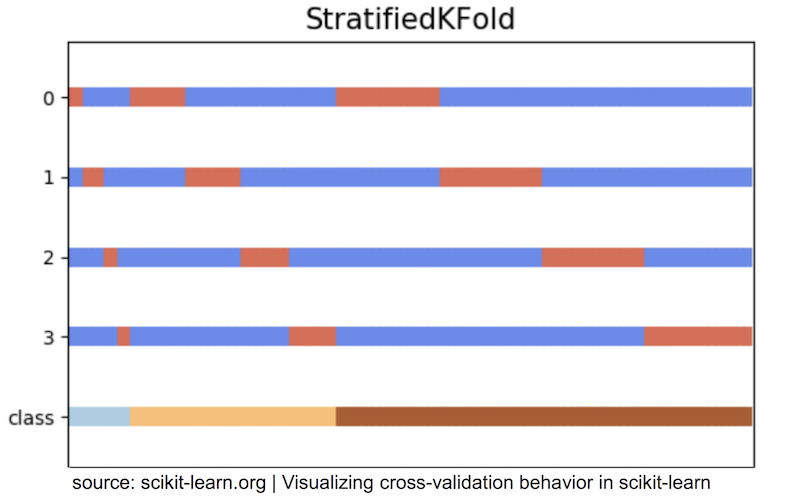

In [29]:
 illustration.strat_kfold_cv

# How to improve our model?
Banyak sekali hal yang bisa kita coba untuk improve model kita. Secara umum, dapat dibagi menjadi 2:
- **Improvement melalui data**
  - Feature Enginering
- **Improvement melalui model**
  - Tuning model yang sedang digunakan
  - Menggunakan model berbeda
  
  
# Improvement melalui data
Pada dasarnya terdapat banyak sekali metode feature engineering, dan sangat bergantung dengan kondisi datanya.
Berikut beberapa contoh feature engineering:
- **Feature scalling**
  - MinMax
  - Standard
  - Robust
- **Feature transformation**
  - Logaritmik
  - Pangkat
  - Trigonometrik
- **Type Conversion**
  - Categorical to numeric (encoding & hashing)
  - Numerical to categoric (binning)
- **Adding feature**
  - Domain knowledge
  - Feature crossing
  - Feature summation or differencing
- **Reducing feature**
  - Dimensionality reduction
  - Feature importance and selection
- **Text data**
  - Flattening
  - Filtering
  - Chunking

# Improvement melalui data: Feature Scaling

In [30]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

Masalah besar KNN yaitu untuk mencari pattern atau prediksi sangat bergantung pada `jarak`, sehingga perbedaan distance antar feature akan sangat jomplang di KNN, sehingga kita membutuhkan `scaling` untuk menyamakan skala datanya

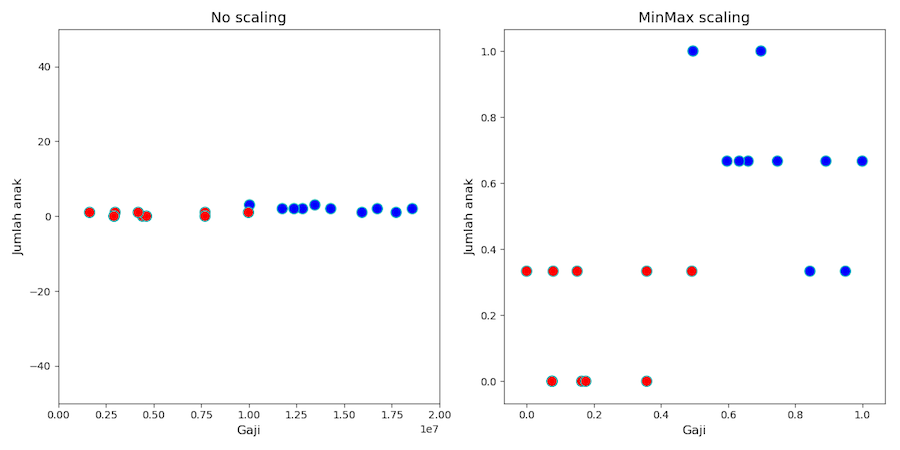

In [31]:
illustration.knn_scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data test `tidak boleh di fit` karena data Min maupun Max harus berdasarkan dari data yang dipelajari oleh Model

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9185393258426966, 0.7430167597765364)

`Naik beberapa persen`

# Improvement melalui model: Hyperparameter Tuning

## Tuning n_neighbor tanpa scaling

In [61]:
neighbor = np.arange(1, 51, 2) # neighbor knn harus ganjil agar tetap ada class yang menang
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.values, y_train) # menggunakan X_train.values agar nama kolom tidak ikut dalam proses train (tujuannya hanya agar tidak ada warning saja, tidak ada pengaruh lebih)
    
    train_score.append(knn.score(X_train.values, y_train))
    test_score.append(knn.score(X_test.values, y_test))

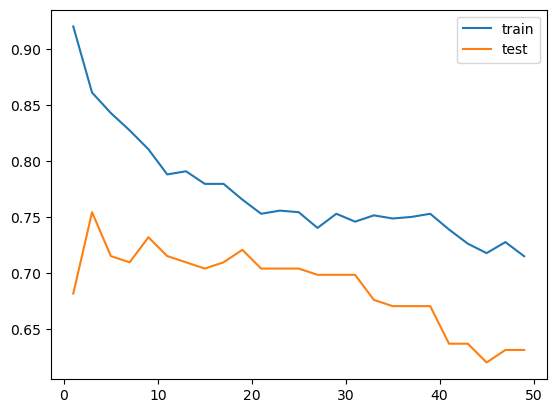

In [62]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

In [63]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


## Tuning n_neighbor dengan scaling

In [69]:
neighbor = np.arange(1, 51, 2) # neighbor knn harus ganjil agar tetap ada class yang menang
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

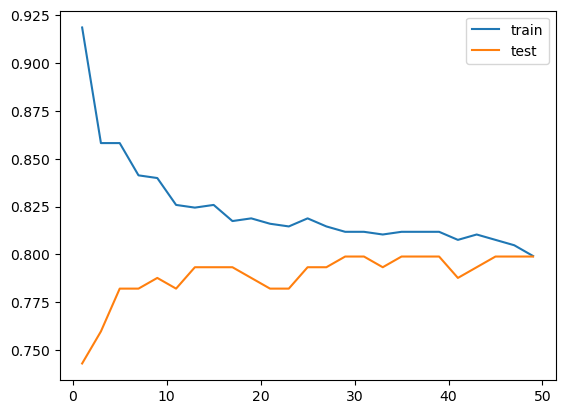

In [70]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

In [71]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7988826815642458
n_neighbor: 29


## Tuning n_neighbor dengan weight by distance

In [72]:
neighbor = np.arange(1, 51, 2) # neighbor knn harus ganjil agar tetap ada class yang menang
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

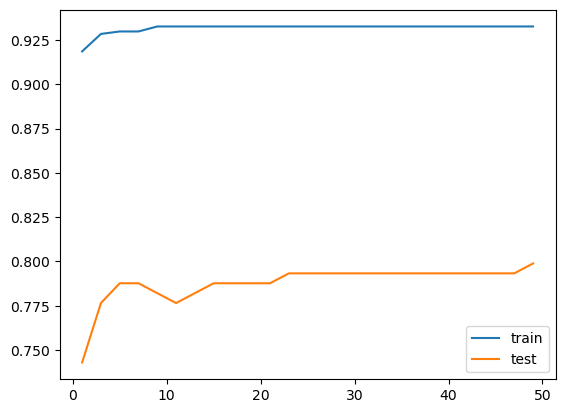

In [73]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

In [74]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7988826815642458
n_neighbor: 49


### Pakai Manhattan Distance

In [75]:
neighbor = np.arange(1, 51, 2) # neighbor knn harus ganjil agar tetap ada class yang menang
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

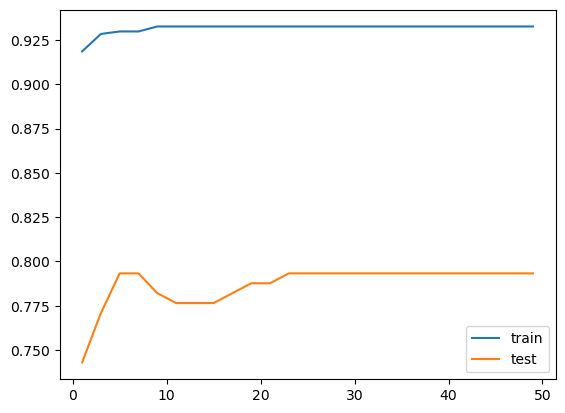

In [76]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

In [77]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7932960893854749
n_neighbor: 5
